In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Cargar CSV a Pandas DataFrame

In [2]:
bsd_train_path = '../../data/data_small/bike-sharing-demand/train.csv'
bsd_df = pd.read_csv(bsd_train_path, parse_dates=['datetime'])

# Ingeniería de características desde 'datetime'
bsd_df['datetime'] = pd.to_datetime(bsd_df['datetime'])
bsd_df['year'] = bsd_df['datetime'].dt.year
bsd_df['month'] = bsd_df['datetime'].dt.month
bsd_df['day'] = bsd_df['datetime'].dt.day
bsd_df['hour'] = bsd_df['datetime'].dt.hour
bsd_df['weekday'] = bsd_df['datetime'].dt.weekday
bsd_df['day_type'] = bsd_df['datetime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Verificar dimensiones y columnas
print("Dimensiones del dataset:", bsd_df.shape)  # (10886, 17)

Dimensiones del dataset: (10886, 18)


### Análisis - Cantidad de alquileres según la hora del día

In [3]:
# Se agrupan las horas en el dataset y se calcula el promedio la cantidad de alquileres
hourly_demand = bsd_df.groupby(['hour'])['count'].mean().reset_index()

# Demanda por hora 
fig = px.line(hourly_demand, x='hour', y='count',
              title='Demanda Promedio por Hora: Todos los dias',
              labels={'hour': 'Hora del Día', 'count': 'Número Promedio de Alquileres', 'day_type': 'Tipo de Día'},
              markers=True)
fig.show()

**Cantidad de alquileres por hora en todos los días:** 

El análisis demuestra que la cantidad de alquileres tiene picos a las 8 de la mañana y a las 5 de la tarde. Esto puede indicar que las personas utilizan el servicio principalmente para transportarse hacia y desde sus trabajos. Vale la pena analizar si el comportamiento se mantiene los fines de semana.

In [4]:
# Se agrupan las horas en el dataset por tipo de día (día laboral o fin de semana) y se calcula el promedio la cantidad de alquileres
hourly_demand = bsd_df.groupby(['hour', 'day_type'])['count'].mean().reset_index()

# demanda por hora y tipo de dia
fig = px.line(hourly_demand, x='hour', y='count', color='day_type',
              title='Demanda Promedio por Hora: Días Laborables vs. Fines de Semana',
              labels={'hour': 'Hora del Día', 'count': 'Número Promedio de Alquileres', 'day_type': 'Tipo de Día'},
              markers=True)
fig.show()

**Cantidad de alquileres por hora y por tipo de día:** 

Al separar los datos según el tipo de día (curva azul representando día laboral y curva roja representando los fines de semana), es aún más evidente que de lunes a viernes, el servicio es utilizado principalmente para transportarse hacia y desde el trabajo debido a los fuertes picos que se presentan a las 8 de la mañana y a las 5 de la tarde. En Estado Unidos la jornada laboral suele ser de 9:00 AM a 5:00 PM, lo que explica fácilmente este comportamiento en la curva azul.

Por otra parte, la linea roja muestra que en los fines de semana el servicio se utiliza principalmente en horas de la tarde, casi de manera uniforme desde el medio día hasta las 4 de la tarde. Esto es probablemente porque los usuarios del servicio utilizan las ciclas para transportarse a centros de ocio, los cuales no suelen abrir temprano.

### Análisis - Distribución de la cantidad de alquileres según el clima

In [5]:
# Boxplot para cada tipo de clima
fig = px.box(bsd_df, x='weather', y='count', title='Distribución de la Demanda por Condición Climática',
             labels={'weather': 'Condición Climática', 'count': 'Número de Alquileres'})
fig.update_xaxes(tickvals=[1, 2, 3, 4], ticktext=['Despejado', 'Neblina', 'Lluvia o nieve leve', 'Lluvia o nieve fuerte'])
fig.show()

**Distribución de la demanda de bicicletas según las condiciones climáticas:**

El análisis revela que, como era de esperarse, el clima tiene un impacto notable en la demanda de bicicletas. La diferencia más evidente se observa al comparar la distribución en días de lluvia o nieve con otras condiciones: en estos casos, la demanda tiende a concentrarse en valores bajos. Por ejemplo, la gráfica indica que más del 75% de los registros bajo lluvia están por debajo de 161 alquileres, mientras que en días despejados este valor sube a 305. En el caso de lluvia o nieve intensa, todos los datos se agrupan en un solo punto, lo que sugiere que se trata de un outlier y que este tipo de clima no está suficientemente representado en el conjunto de datos.

Además, se detecta una presencia significativa de outliers en todas las condiciones climáticas. Sería interesante investigar estos casos en mayor detalle; por ejemplo, consultar fuentes de noticias podría arrojar luz sobre los eventos o circunstancias específicas que ocurrieron en esas fechas y rangos horarios.

### Análisis - Comparacion del promedio de alquileres según el mes y el año

In [6]:
# Calcular demanda promedio por mes y año
monthly_demand = bsd_df.groupby(['year', 'month'])['count'].mean().reset_index()

meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(meses.values()),
    y=monthly_demand[monthly_demand['year']==2011]['count'],
    name='2011',
    marker_color='indianred',
    text=monthly_demand[monthly_demand['year']==2011]['count']
))
fig.add_trace(go.Bar(
    x=list(meses.values()),
    y=monthly_demand[monthly_demand['year']==2012]['count'],
    name='2012',
    marker_color='lightsalmon',
    text=monthly_demand[monthly_demand['year']==2012]['count']
))

fig.update_layout(barmode='group', xaxis_tickangle=0,title='Demanda Promedio Mensual por Año (2011 vs 2012)')
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

**Comparación de la demanda promedio mensual entre 2011 y 2012:**

El gráfico muestra que la demanda aumentó significativamente del 2011 al 2012. Esto puede indicar que los usuarios encuentran util el servicio y se encuentran satisfechos, lo que dio a conocer el servicio y aumentó el número de usuarios. Adicionalmente se observa una tendencia mensual muy similar para los dos años. Con una ligera excepción en Julio de 2012 que es donde se esperaba la mayor demanda basados en el comportamiento del 2011. 

### Análisis - Correlación entre temperatura y demanda de bicicletas

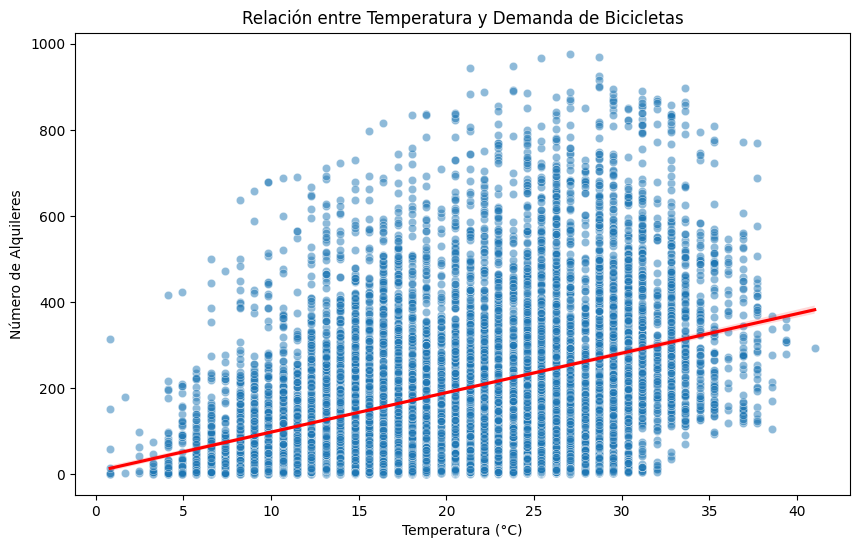

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=bsd_df, alpha=0.5)
sns.regplot(x='temp', y='count', data=bsd_df, scatter=False, color='red', order=1)
plt.title('Relación entre Temperatura y Demanda de Bicicletas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Número de Alquileres')
plt.show()

**Correlación entre temperatura y demanda de bicicletas:**

En resumen, la gráfica muestra una relación positiva entre la temperatura y la demanda de bicicletas, con un aumento general en los alquileres a medida que la temperatura sube. El rango de 15 °C a 30 °C parece ser el más favorable, con la mayor densidad de alquileres. Sin embargo, la variabilidad en los datos indica que la temperatura no es el único factor determinante, y un análisis más profundo con variables adicionales podría ofrecer una visión más completa de los patrones de demanda.

In [8]:
# Map season codes to names
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
bsd_df['season'] = bsd_df['season'].map(season_map)

# Create sunburst chart
fig = px.sunburst(bsd_df, path=['season', 'day_type', 'hour'], values='count',
                  title='Sunburst Chart of Bike Demand by Season, Day Type, and Hour',
                  color='count', color_continuous_scale='Viridis')
fig.update_layout(width=800, height=800)
fig.show()